In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from src.viz import visualize_cross_validation

%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 300

In [3]:
df = pd.read_csv('../data/interim/house_prices_cleaned.csv')
df.shape

(6076, 5)

In [4]:
df.sample(5)

,location,total_sqft,bath,price,bhk
516,Banashankari,1290.0,2.0,80.00,2
4570,Vasanthapura,1135.0,2.0,39.73,2
247,Akshaya Nagar,1893.0,4.0,95.00,3
1145,Devanahalli,1080.0,2.0,52.00,2
4624,Vittasandra,1246.0,2.0,64.50,2


Applying one-hot encoding on location attribute

In [5]:
# creating the dummy variable and dropping the last column for preventing dummy trap
dummy = pd.get_dummies(df['location'])\
          .drop('other', axis=1)

# joining it back to the original dataframe
print(df.shape)
df = pd.concat([df, dummy], axis=1)\
        .drop('location', axis=1)
print(df.shape)
df.head()

(6076, 5)
(6076, 197)


,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1170.0,2.0,40.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1425.0,2.0,65.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,947.0,2.0,43.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1417.0,2.0,76.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1230.0,2.0,58.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Splitting the data

In [6]:
# creating independent and dependent variable
X = df.drop('price', axis=1)
y = df['price']
# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=10)

In [7]:
# creating a linear model
model = LinearRegression()
# training the model using training data
model.fit(X_train,y_train)
# checking the R^2 score
model.score(X_test,y_test)

0.9096263176941511

The model has given suprisingly good result, let's see if we can increase it

# KFold Cross Validation

We ran 10 shuffle splits
Minimum cross-validation score is 0.7873828605221513
Mean cross-validation score is 0.8580531112021926
Maximum cross-validation score is 0.9250404698316826


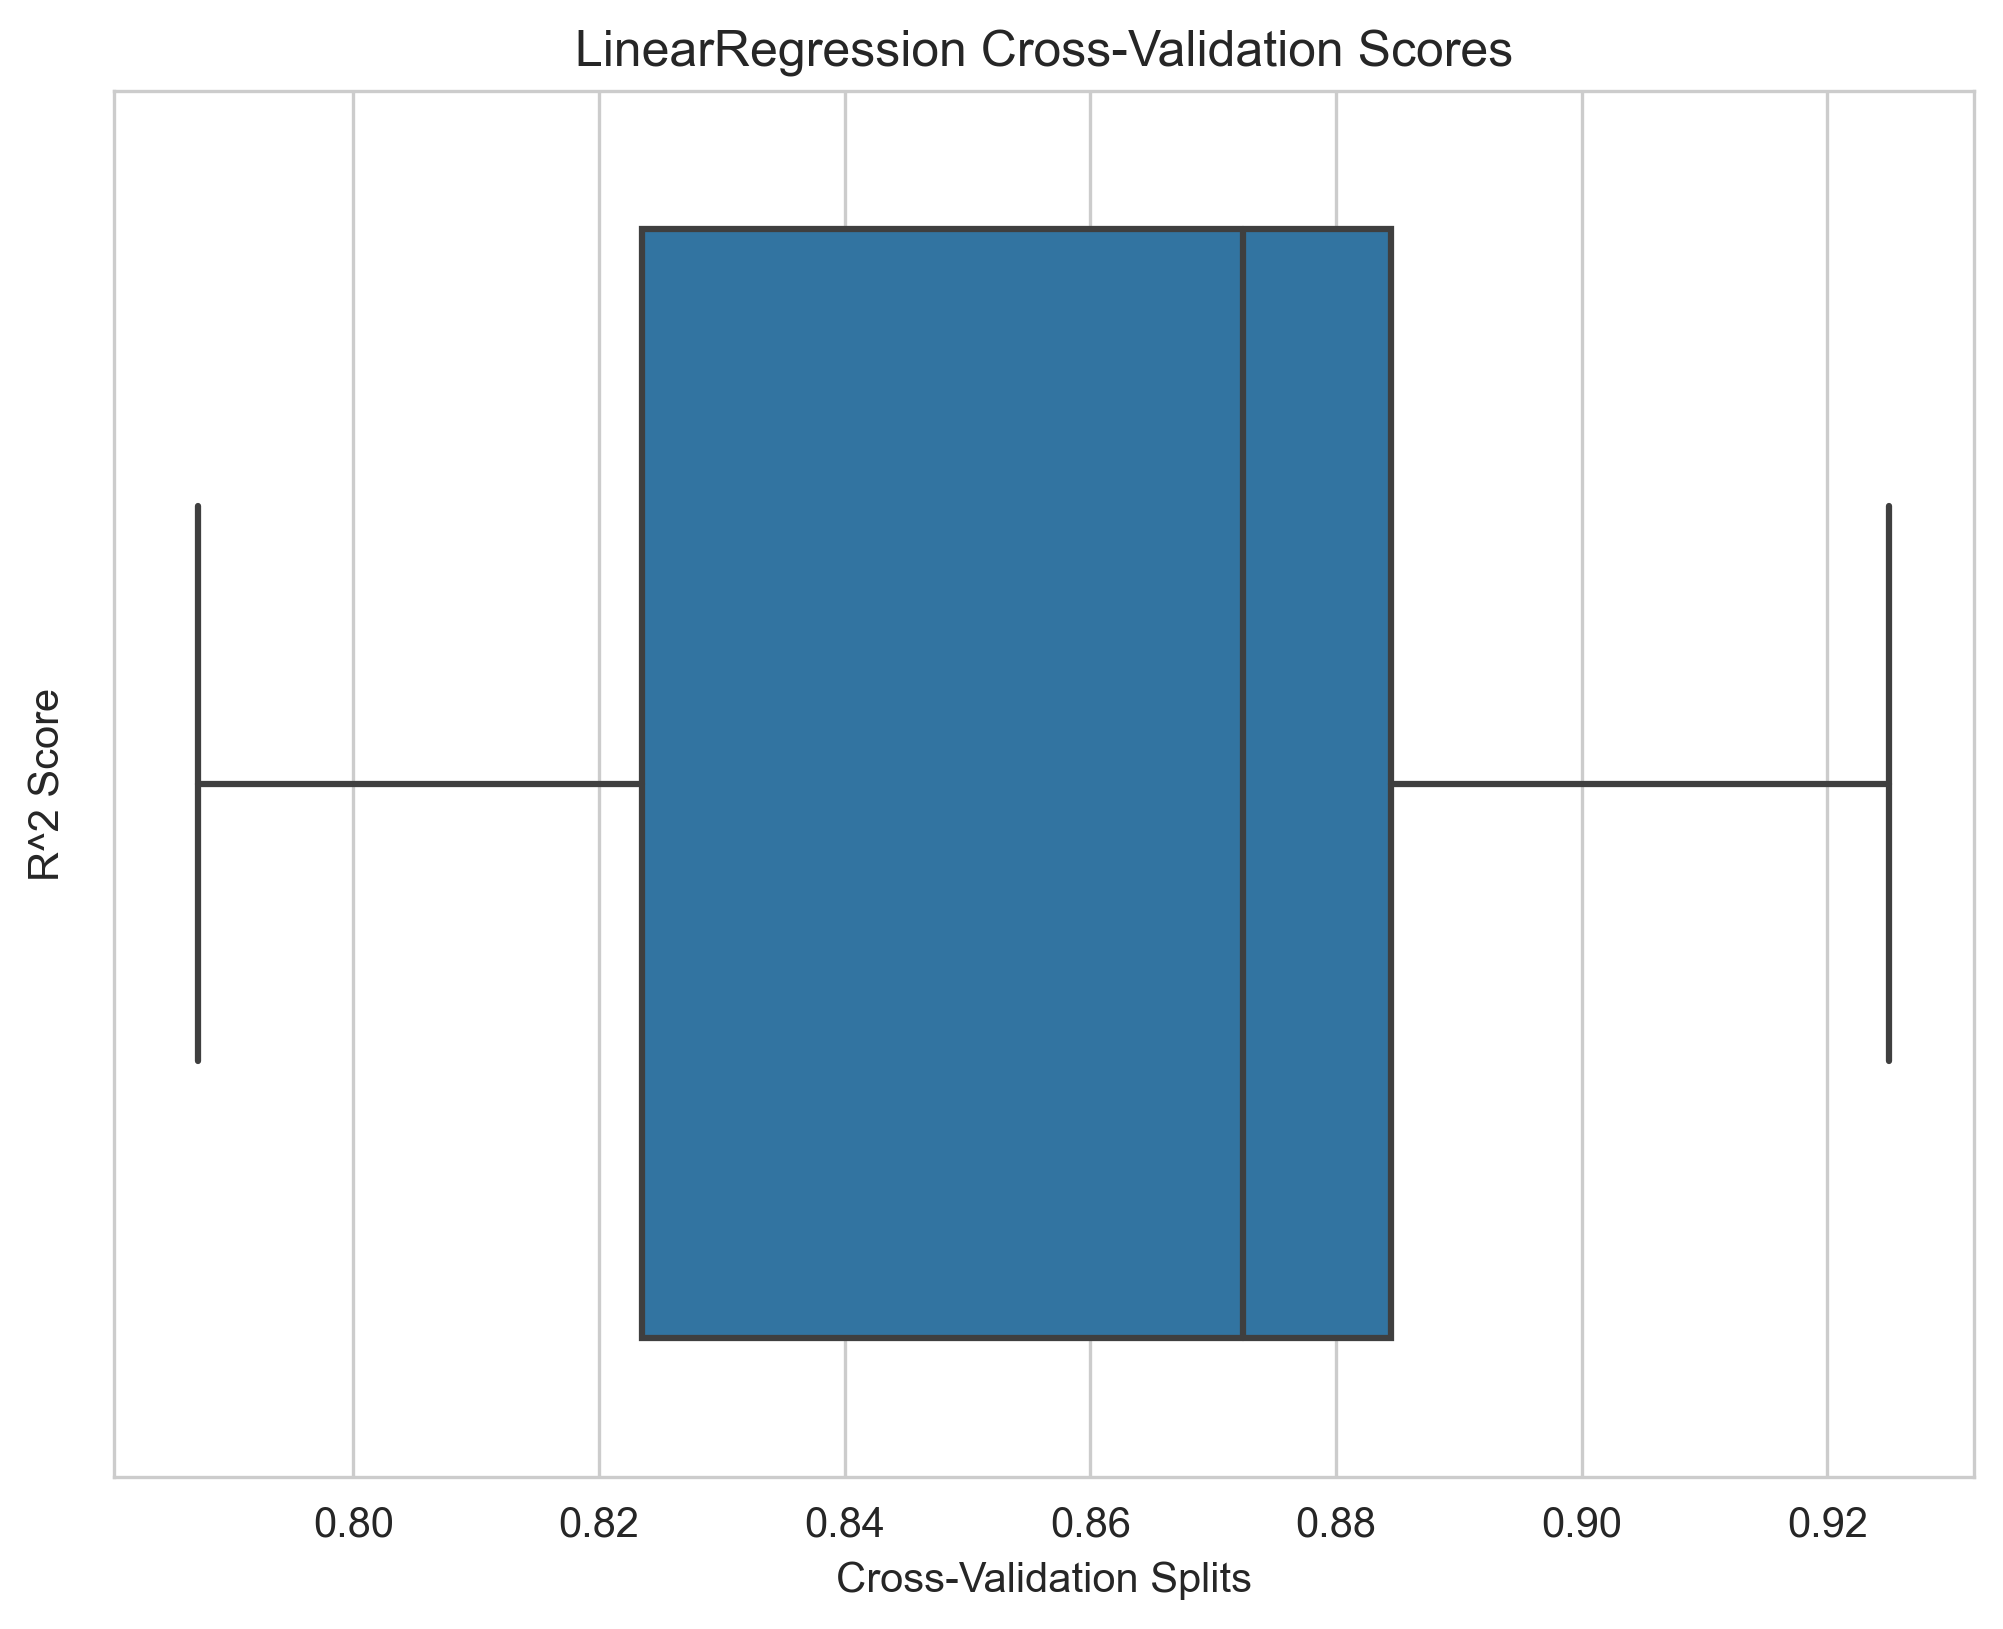

In [9]:
# performing KFold Cross Validation
model = LinearRegression()
visualize_cross_validation(model, X,y, n_splits=10,test_size=0.2, random_state=0)